# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

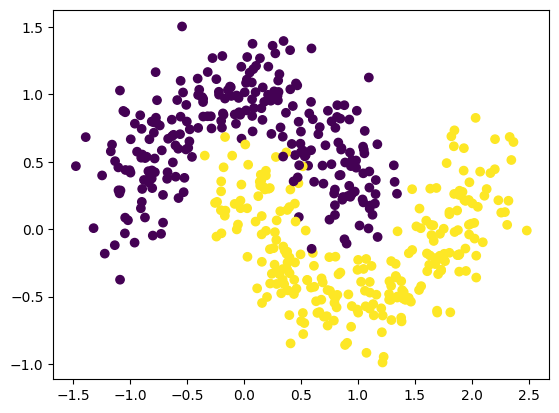

In [ ]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.3, random_state=42)



## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

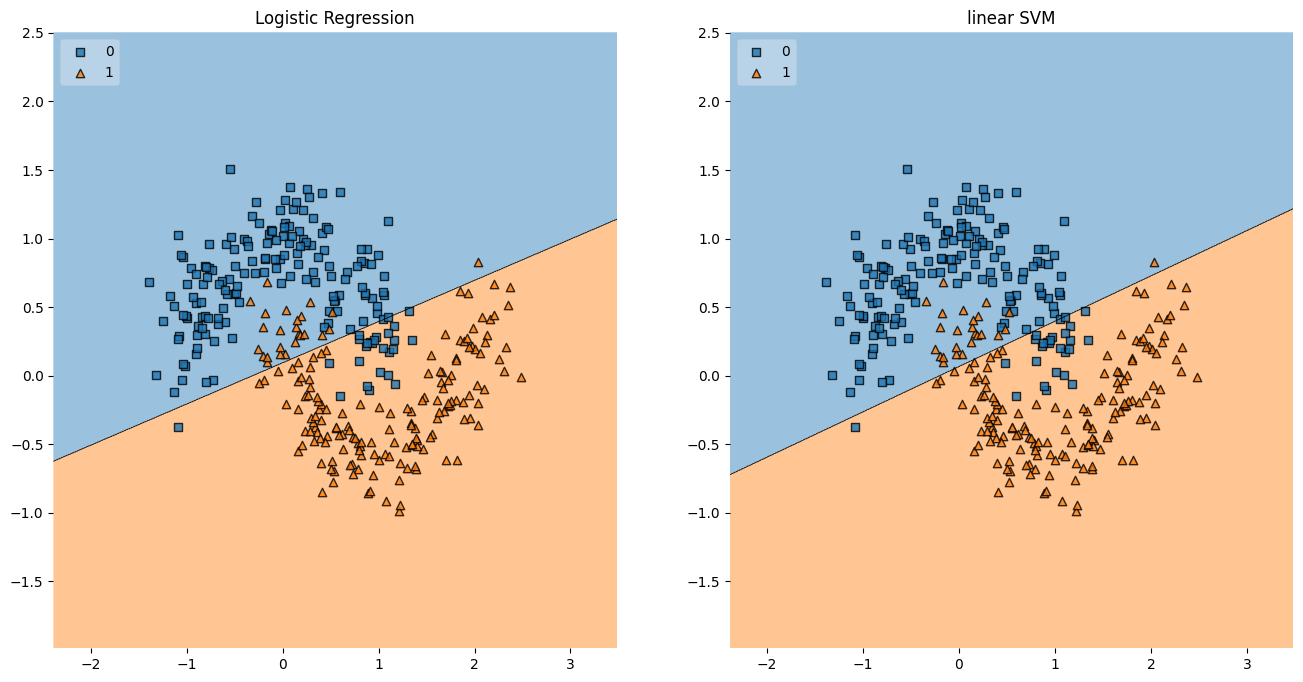

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import itertools
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

lr = LogisticRegression(C=1, fit_intercept=True, max_iter=300, random_state=42) # add some params
svm = SVC(kernel='linear', C=1, max_iter=300, random_state=42) # here too

# Plotting Decision Regions
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(16, 8))


for clf, lab, grd in zip([lr, svm],
                         ['Logistic Regression','linear SVM'],
                         itertools.product([0, 1], repeat=1)):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
    plt.title(lab)
plt.show()

### YOUR CODE HERE

In [ ]:
from sklearn.metrics import roc_auc_score

print('ROC AUC for log reg :', roc_auc_score(moons_labels, lr.predict(moons_points)))
print('ROC AUC for SVM with linear kernel :', roc_auc_score(moons_labels, svm.predict(moons_points)))

ROC AUC for log reg : 0.8599999999999999
ROC AUC for SVM with linear kernel : 0.8579999999999999


Конечно, линейная модель описывает неотделимые и сильно смешанные выборки плохо

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


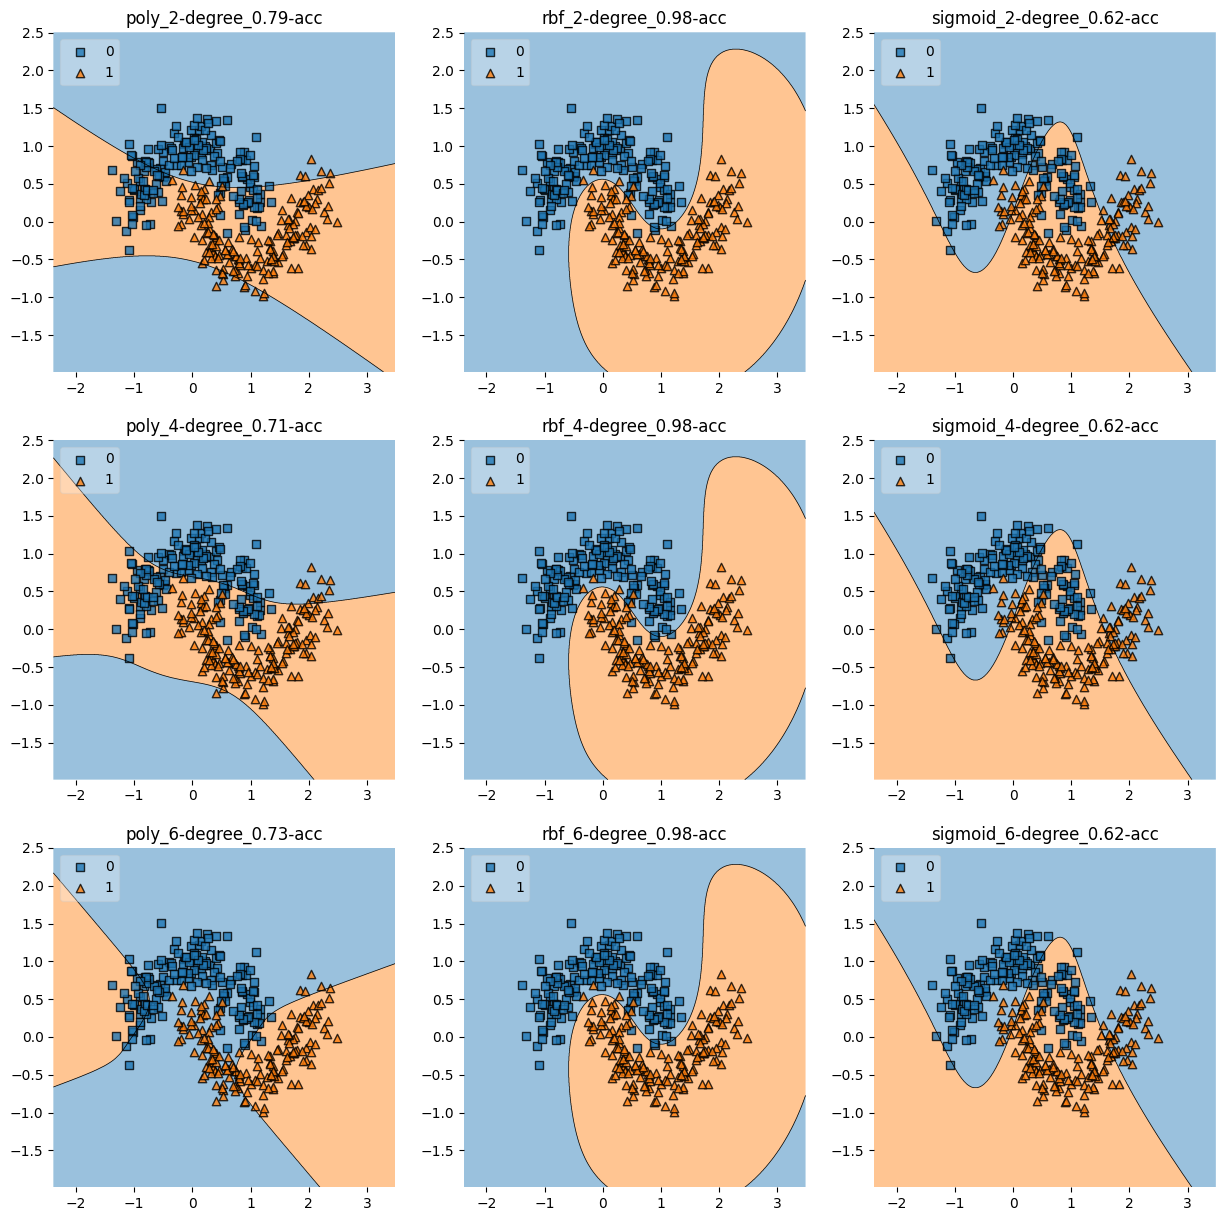

In [ ]:
### YOUR CODE HERE
from sklearn.metrics import accuracy_score



svm_poly = SVC(kernel='poly', C=1, max_iter=200, random_state=42)
svm_rbf = SVC(kernel='rbf', C=1, max_iter=200, random_state=42)
svm_sigmoid = SVC(kernel='sigmoid', C=1, max_iter=200, random_state=42)

gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(15, 15))



for clf, lab, grd, degree in zip(
                         [svm_poly, svm_rbf, svm_sigmoid]*3,
                         ['poly','rbf', 'sigmoid']*3,
                         itertools.product([0, 1, 2], repeat=2),
                         [2, 2, 2, 4, 4, 4, 6, 6, 6]):
    clf.degree = degree
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
    acc = np.round(accuracy_score(clf.predict(X_test), y_test), 2)
    plt.title(f'{lab}_{str(degree)}-degree_{str(acc)}-acc' )
plt.show()



## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Accuracy:  0.987


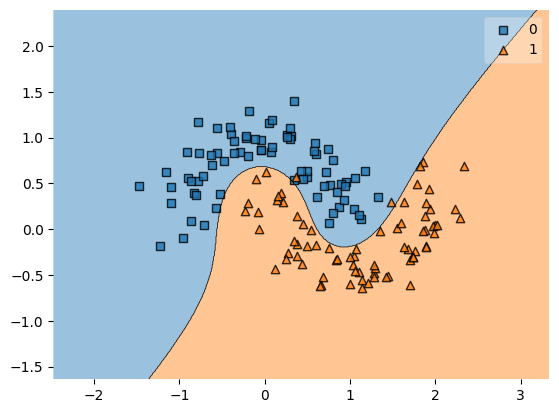

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

steps = [
    ("polynomial", PolynomialFeatures(degree=3)),
    ("classifier", LogisticRegression(C=100, max_iter=1000)),
]


pipeline = Pipeline(steps)
model = pipeline.fit(X_train, y_train)
plot_decision_regions(X=X_test, y=y_test, clf=pipeline)

print("Accuracy: ", np.round(accuracy_score(pipeline.predict(X_test), y_test), 3))






### YOUR CODE HERE

Полученный результат ближе всего к svm_rbf и по точности и по виду границы. Я исполозьвал степень poly=3, что выглядит похоже на степени svm_rbf 2, 4, 6, использованные ранее.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

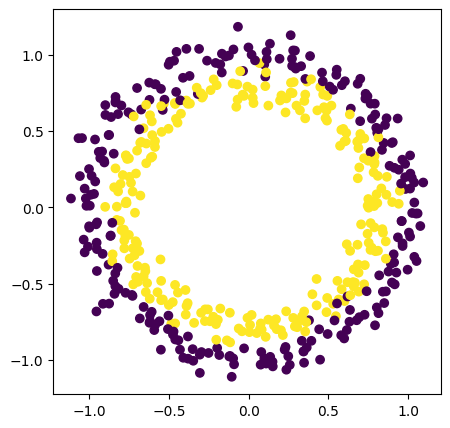

In [ ]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)





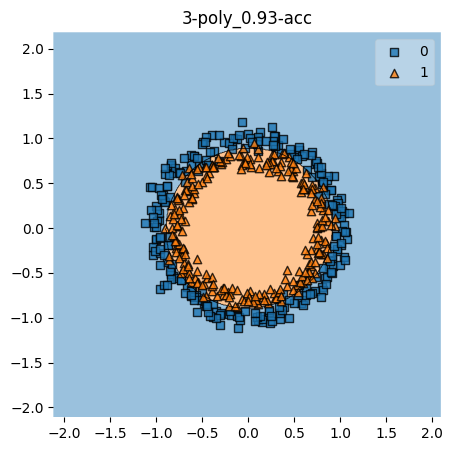

In [ ]:
fig = plt.figure(figsize=(5, 5))

steps = [
    ("polynomial", PolynomialFeatures(degree=3)),
    ("classifier", LogisticRegression(C=100, max_iter=1000)),
]


pipeline = Pipeline(steps)
model = pipeline.fit(circles_points, circles_labels)
plot_decision_regions(X=circles_points, y=circles_labels, clf=pipeline)

acc = np.round(accuracy_score(model.predict(circles_points), circles_labels ), 2)
plt.title(f'{str(3)}-poly_{str(acc)}-acc')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy is: 0.93


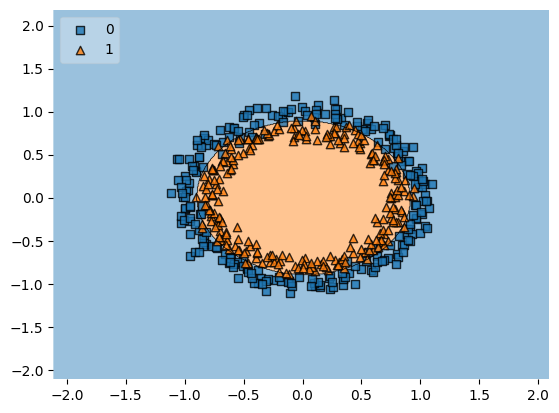

In [ ]:
model_svm_rbf = svm_rbf.fit(circles_points, circles_labels)
plot_decision_regions(X=circles_points, y=circles_labels, clf=model_svm_rbf, legend=2)
acc = np.round(accuracy_score(model_svm_rbf.predict(circles_points), circles_labels ), 2)
print('Accuracy is:', acc)

And even more:

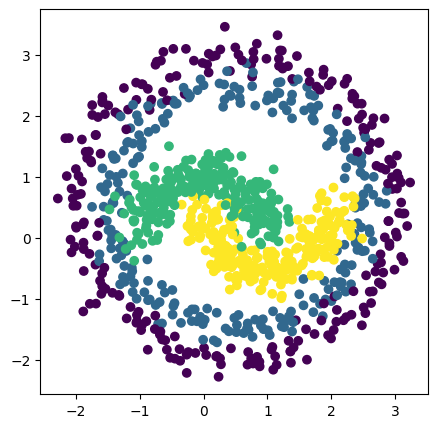

In [ ]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


Accuracy is: 0.92


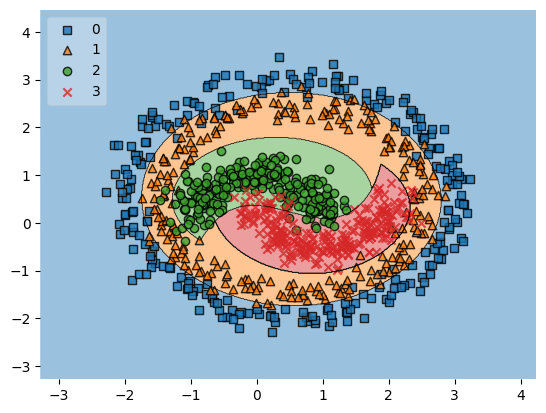

In [ ]:
model_svm_rbf = svm_rbf.fit(points, labels)
plot_decision_regions(X=points, y=labels, clf=model_svm_rbf, legend=2)
acc = np.round(accuracy_score(model_svm_rbf.predict(points), labels ), 2)
print('Accuracy is:', acc)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


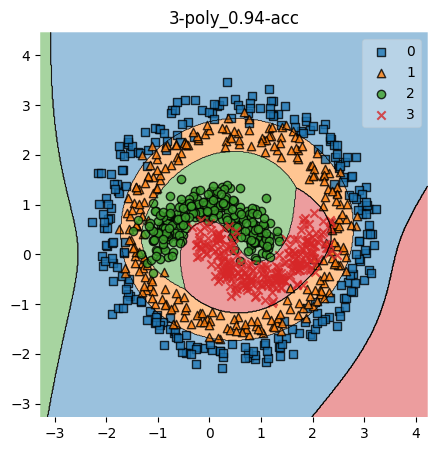

In [ ]:
fig = plt.figure(figsize=(5, 5))

steps = [
    ("polynomial", PolynomialFeatures(degree=3)),
    ("classifier", LogisticRegression(C=100, max_iter=1000)),
]


pipeline = Pipeline(steps)
model = pipeline.fit(points, labels)
plot_decision_regions(X=points, y=labels, clf=pipeline)

acc = np.round(accuracy_score(model.predict(points), labels ), 2)
plt.title(f'{str(3)}-poly_{str(acc)}-acc')

plt.show()

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Как мы видим, предварительная обработка данных с помощью полиномиальных фичей позволяет логистической регрессии справляться с хорошей точностью. Также с svm с ядром rbf хорошо описывает кругоподобные выборки.

In [ ]:
### YOUR CODE HERE
